In [1]:
#  MNIST tutorial (handwritten printed digits recognition tutorial)
#  modified from
#  https://elitedatascience.com/keras-tutorial-deep-learning-in-python
#  for SDSC SI2017

# ----------- IMPORT STATEMENTS ---------------
import numpy as np
np.random.seed(1)  # for reproducibility

from keras.models import Sequential               #Sequential models are the standard stack of layers models
from keras.layers import Dense, Dropout, Activation, Flatten   #These are core layer specification functions
from keras.layers import Convolution2D, MaxPooling2D           #These are convolution layer functions
from keras.utils import np_utils                         #Some utilities
from keras import optimizers                             #For training algorithm
#---------------------------------------------
print('import done')

Using TensorFlow backend.


part 1 done


In [2]:
#--------------- LOAD and PREPARE DATA STATEMENTS ----------------
# Load some numpy arrays that have the MNIST data
#  (these are subsets extracted from the MNIST data set in Keras)
X_train=np.load('X_train5k.npy')
Y_train=np.load('Y_train5k.npy')
X_test =np.load('X_test.npy')
Y_test =np.load('Y_test.npy')

print(X_train.shape)     #review the dimensions Note python3 uses print(X..) python 2 uses print X...

#save a few training images with the label in the file name 
from PIL import Image
for i in range(0,3):
   im = Image.fromarray(X_train[i,:,:])
   im.save("Xtrain_num"+str(i)+"_cat_"+str(Y_train[i])+".jpeg")
print('img load done')

(5000, 28, 28)
img load done


In [3]:
# --------- Reshape input data ------------
#  b/c Keras expects N-3D images (ie 4D matrix)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test  = X_test.reshape(X_test.shape[0],   1, 28, 28)

#To confirm, we can print X_train's dimensions again:
print(X_train.shape)

#convert and put into 0-1 range
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
X_train /= 255
X_test  /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test  = np_utils.to_categorical(Y_test,  10)

# ------------- End loading and preparing data --------------
np.amax(X_train)   #this gets the max value over a flattened numpy array
print('prep done')

(5000, 1, 28, 28)
prep done


In [69]:
# --------------Set up Model ---------------------
mymodel = Sequential()

numfilters = 16
#add convolution layer of 32 or 16 or __ filters, 3x3 each, 
#     input shape for 1 image, channels refers to color dimension of input image
mymodel.add(Convolution2D(numfilters, (3, 3),strides=1,  data_format="channels_first",activation='relu', input_shape=(1,28,28))) 
 
print('modeldef and first conv layer done')


modeldef and first conv layer done


In [70]:
mymodel.layers[0].output # use this to check sizes of output  

<tf.Tensor 'conv2d_5/Relu:0' shape=(?, 16, 26, 26) dtype=float32>

In [71]:
#-----------------Now add more Convolution layers
mymodel.add(Convolution2D(numfilters, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2,2))) #get Max over 2D region,and slide

#optional?
mymodel.add(Dropout(0.25))
 
mymodel.add(Flatten())            #reorganize 2DxFilters output into 1D

In [72]:
mymodel.layers[2].output   #size of output layer for max pooling

<tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 7, 12, 16) dtype=float32>

In [73]:
#----------------Now add final classification layers
mymodel.add(Dense(128, activation='relu'))  #enter number of hidden units (no good rule, but start with ~ num of previous output) 
mymodel.add(Dropout(0.5))
mymodel.add(Dense(10, activation='softmax'))
print('assemble model done')

assemble model done


In [74]:
# --------- Now assemble (ie compile TensorFlow commands) and run -----
mymodel.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

In [75]:
#------------ Now Run Training
mymodel.fit(X_train, Y_train, 
          batch_size=32, epochs=15, verbose=1)  #batch up 32 examples before adjusting weights,
                                                #sweep through training data 'epochs' times


Epoch 1/15
5000/5000 [==============================] - 1s - loss: 2.2134 - acc: 0.2080     
Epoch 2/15
5000/5000 [==============================] - 1s - loss: 1.5684 - acc: 0.4872     
Epoch 3/15
5000/5000 [==============================] - 1s - loss: 0.9870 - acc: 0.6880     
Epoch 4/15
5000/5000 [==============================] - 1s - loss: 0.7813 - acc: 0.7520     
Epoch 5/15
5000/5000 [==============================] - 1s - loss: 0.6449 - acc: 0.7926     
Epoch 6/15
5000/5000 [==============================] - 1s - loss: 0.5880 - acc: 0.8226     
Epoch 7/15
5000/5000 [==============================] - 1s - loss: 0.5357 - acc: 0.8380     
Epoch 8/15
5000/5000 [==============================] - 1s - loss: 0.4896 - acc: 0.8494     
Epoch 9/15
5000/5000 [==============================] - 1s - loss: 0.4620 - acc: 0.8566     
Epoch 10/15
5000/5000 [==============================] - 1s - loss: 0.4123 - acc: 0.8760     
Epoch 11/15
5000/5000 [==============================] - 1s - loss: 0

In [85]:
#--------- Get overall prediction score
trainscore = mymodel.evaluate(X_train, Y_train, verbose=1) # get overal score
testscore  = mymodel.evaluate(X_test, Y_test, verbose=1) # get overal score
#somepred  = mymodel.predict(X_test,verbose=0)           # get predicted labels
print(trainscore)
print(testscore)

10000/10000 [==============================] - 0s
[0.17481975257396698, 0.94999998807907104]
[0.22068385779857635, 0.93440002202987671]


In [12]:
#-----------Optional: View some of the output
print(somepred[1:3])
#Notice each row is 10 elements, each element is a prediction of the number labels 
print(Y_test[1:3])

[[  9.42957937e-04   3.00569413e-03   9.58147287e-01   5.45267202e-03
    4.38347843e-06   4.43019299e-03   2.34138723e-02   1.51725008e-05
    4.58504632e-03   2.70302803e-06]
 [  6.50797156e-05   9.90308940e-01   1.96484011e-03   8.63826601e-04
    2.97552440e-04   4.14608076e-04   1.85040955e-03   2.58441246e-03
    1.04186684e-03   6.08464004e-04]]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


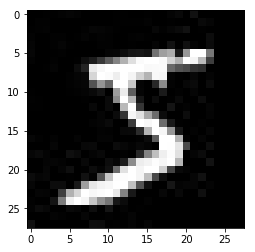

im loaded


In [64]:
#To view a sample image
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg

img_filename = "Xtrain_num0_cat_5.jpeg" #% scriptDir 
im = mpimg.imread(img_filename)
plt.figure()
plt.imshow(im,'gray')
plt.show()
print('im loaded')

4.0


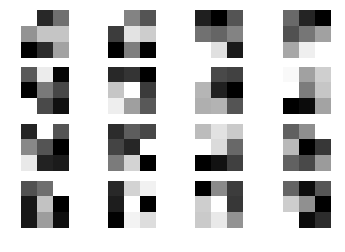

done plotting weights mosaic


In [54]:
# ------------ GET WEIGHTS From Convolution Layer and make mosaic image 
Wlist   =mymodel.layers[0].get_weights()
W3D     =np.squeeze(Wlist[0])
W3D.shape
W3Dchan =W3D.swapaxes(1,2).swapaxes(0,1)  #get 32 as 1st dimension

Wmin       =np.amin(W3Dchan)
Wmax       =np.amax(W3Dchan-Wmin)
Wsc        =np.int_(255*(W3Dchan-Wmin)/Wmax)
ncol =4
nrow =np.ceil(numfilters/ncol)
print(nrow)
plt.figure()
for i in range(Wsc.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(Wsc[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting weights mosaic')

In [66]:
#  ---------------- NOW Visualize the activations for the first training example --------
from keras import backend as K    #backend is tensorflow

get_layer_output = K.function([mymodel.layers[0].input],[mymodel.layers[0].output]) #set up function
x                = np.expand_dims(X_train[0],0)           #set up a 4D input of 1 image training set 
layer_output     = get_layer_output([x])[0]  #get output using K.function

layer_output.shape    #check output shape and use it in next cell, first dimension is number of filters



(1, 16, 26, 26)

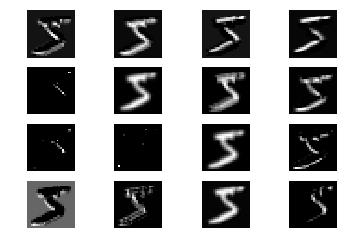

done plotting layer activatio output mosaic


In [67]:
# --- Now output a mosaic
layeroutput3D      = np.squeeze(layer_output)      
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(layeroutput3D.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer activation output mosaic')
